In [1]:
!pip install petroeval==1.1.0

  Using cached petroeval-1.1.0-py3-none-any.whl (6.1 kB)
  Attempting uninstall: petroeval
    Found existing installation: petroeval 1.0.8
    Uninstalling petroeval-1.0.8:
      Successfully uninstalled petroeval-1.0.8


In [5]:
petroeval.__file__

'/home/olawale/anaconda3/lib/python3.7/site-packages/petroeval/__init__.py'

In [10]:
#import well log in las file and convert to dataframe
import lasio
las = lasio.read('WLC_PETRO_COMPUTED_INPUT_1.LAS')
df = las.df()

Header section Parameter regexp=~P was not found.


In [11]:
import petroeval
from petroeval import evaluate_reservoir, visualizations
from petroeval import FormationEvaluation

In [12]:
print(evaluate_reservoir)

<module 'petroeval.evaluate_reservoir' from '/home/olawale/Desktop/petroeval/petroeval/petroeval/evaluate_reservoir.py'>


In [13]:
#create the reservoir section object

reservoir1 = FormationEvaluation(df, 'GR', 'NPHI', 'RHOB', 'RT', 2, 10000, 72)
table = reservoir1.show_table()
print(reservoir1)

In [18]:
#fill missing values using mean values of the columns, specify value if mean shouldn't be applied
#df1 = reservoir1.fill_missing(use_mean=True)

In [14]:
print(visualizations.summary(table))

Title: Petrophysical Summary of the Parameters Evaluated
                GR        LITHO          VSH      NET_PAY        PHIDF  \
count  9997.000000  9999.000000  9997.000000  9999.000000  2717.000000   
mean     82.227914     0.356236     4.109587     0.233323     0.441092   
std      36.974956     0.478910     4.393245     0.422967     0.080894   
min      10.688800     0.000000     0.000000     0.000000     0.153939   
25%      56.037899     0.000000     0.162859     0.000000     0.386061   
50%      81.305603     0.000000     2.437429     0.000000     0.430545   
75%     118.616699     1.000000     8.202534     0.000000     0.487394   
max     161.530197     1.000000    18.381460     1.000000     0.743455   

         PHIE           SW      OIL_SAT  
count  2716.0  2717.000000  2717.000000  
mean      0.0     0.162495     0.837505  
std       0.0     0.041624     0.041624  
min       0.0     0.007649     0.470580  
25%       0.0     0.138382     0.825635  
50%       0.0     0.1546

In [15]:
print(reservoir1.parameters())

{'Gross rock': 3562, 'The Net to Gross is:': 0.6549691184727681, 'Net Pay of reservoir:': 2333, 'Total Porosity:': 0.4410923398333721, 'Effective Porosity:': 0.0, 'Water Saturation:': 0.1624947860041707, 'Oil Saturation:': 0.8375052139958293}


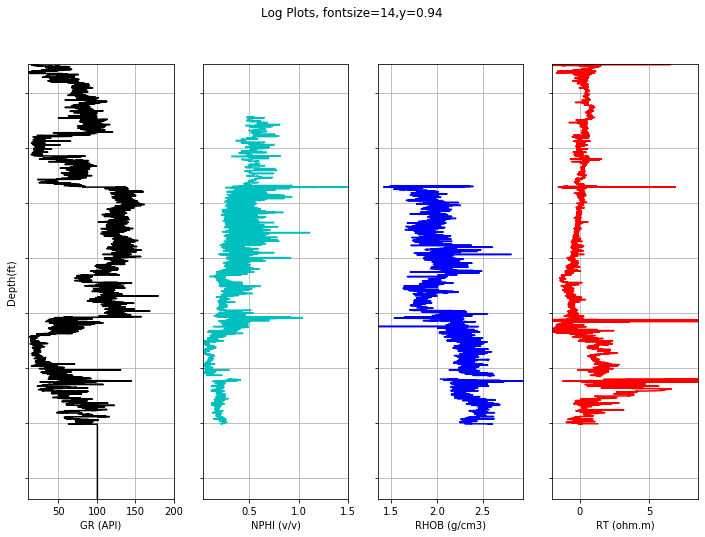

In [20]:
#to display logs for correlation

visualizations.log_plot(df)

In [22]:
df

,CARB_FLAG,COAL_FLAG,DT,GR,NPHI,RD,RHOB,ROP5_RM,RS,RT,SAND_FLAG,DEPTH
DEPTH,,,,,,,,,,,,
239.8776,NaN,NaN,NaN,NaN,NaN,0.7766,NaN,98.863197,4.490900,0.1015,NaN,239.8776
240.0300,NaN,NaN,NaN,NaN,NaN,0.7717,NaN,98.687103,6.752500,0.1000,NaN,240.0300
240.1824,NaN,NaN,NaN,NaN,NaN,0.7717,NaN,99.039299,6.752500,0.1000,NaN,240.1824
240.3348,NaN,NaN,NaN,20.866899,NaN,0.4374,NaN,99.760498,12.005200,0.1000,NaN,240.3348
240.4872,NaN,NaN,NaN,20.984800,NaN,2.3402,NaN,99.748299,139.059204,0.1000,NaN,240.4872
...,...,...,...,...,...,...,...,...,...,...,...,...
4186.1232,NaN,NaN,NaN,100.668998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4186.1232
4186.2756,NaN,NaN,NaN,100.668998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4186.2756
4186.4280,NaN,NaN,NaN,100.668998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4186.4280


In [21]:
df.describe()

,CARB_FLAG,COAL_FLAG,DT,GR,NPHI,RD,RHOB,ROP5_RM,RS,RT,SAND_FLAG,DEPTH
count,2743.000000,2647.0,13077.000000,25895.000000,18063.000000,21265.000000,13951.000000,21520.000000,21272.000000,21274.000000,2651.000000,25899.000000
mean,0.027342,0.0,106.160387,84.868677,0.346371,7.851980,2.124767,35.106875,54.318754,20.857914,0.579404,2213.305200
std,0.163109,0.0,28.132972,35.953262,0.177050,58.463106,0.229125,29.429276,350.372172,254.978691,0.493748,1139.424947
min,0.000000,0.0,-68.827796,10.688800,0.028200,0.100000,1.356800,1.242100,0.100000,0.100000,0.000000,239.877600
25%,0.000000,0.0,78.402496,58.513599,0.210000,0.709200,1.941450,14.788300,0.906700,0.674425,0.000000,1226.591400
50%,0.000000,0.0,114.111999,92.544800,0.332500,1.148300,2.133400,30.173550,1.676500,1.088450,1.000000,2213.305200
75%,0.000000,0.0,131.834197,110.460300,0.485000,1.846200,2.301850,47.812125,6.866400,1.730600,1.000000,3200.019000
max,1.000000,0.0,161.014801,179.878204,1.505700,1319.274040,2.939200,211.007507,5000.000000,5000.000000,1.000000,4186.732800


In [17]:
np.nan

nan

In [13]:
import numpy as np